In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
data = pd.read_excel('Downloads/iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

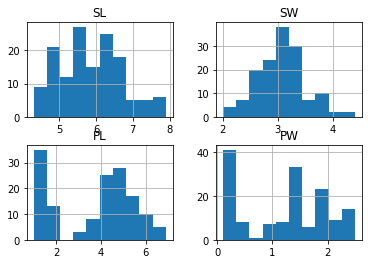

In [7]:
data.hist()

In [8]:
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].median())

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Box plot of dataset')

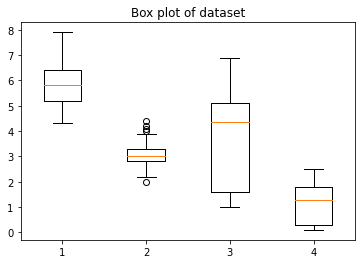

In [10]:
plt.boxplot(data[['SL','SW','PL','PW']])
plt.title('Box plot of dataset')

There is outlier in SW

In [11]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
up = Q3 + 1.5*IQR
print(low,up)

2.1249999999999996 3.9250000000000003


In [12]:
outlier = []
for x in data['SW']:
    if ((x<low) or (x>up)):
        outlier.append(x)

In [13]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [15]:
ind = data['SW']>up
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [16]:
ind = data['SW']<low
data.loc[ind].index

Int64Index([60], dtype='int64')

In [17]:
data.drop([14, 15, 32, 33,60],inplace = True)

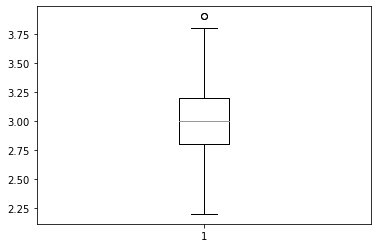

In [19]:
plt.boxplot(data['SW'])
plt.show()

# 3. Find out which classification model gives the best result to predict iris species.

1) Linear Regression

In [20]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score , precision_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))
print('recall is',accuracy_score(y_test, y_pred))
print('precision is',accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  2  9]]
accuracy is 0.918918918918919
recall is 0.918918918918919
precision is 0.918918918918919


2) K Nearest neighbour

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score , precision_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))
print('recall is',accuracy_score(y_test, y_pred))
print('precision is',accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  1 10]]
accuracy is 0.9459459459459459
recall is 0.9459459459459459
precision is 0.9459459459459459


3) SVM

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [28]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))
print('recall is',accuracy_score(y_test, y_pred))
print('precision is',accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  1 10]]
accuracy is 0.9459459459459459
recall is 0.9459459459459459
precision is 0.9459459459459459


4) Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))
print('recall is',accuracy_score(y_test, y_pred))
print('precision is',accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  1 10]]
accuracy is 0.9459459459459459
recall is 0.9459459459459459
precision is 0.9459459459459459


5)Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))
print('recall is',accuracy_score(y_test, y_pred))
print('precision is',accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 11]]
accuracy is 0.972972972972973
recall is 0.972972972972973
precision is 0.972972972972973


6)Kernal SVM

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [34]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  1  0]
 [ 0 10  1]
 [ 0  1 10]]


0.918918918918919

ALL CLASSIFICATION MODELS PERFORMS GOOD AND RANDOM FOREST CLASSIFICATION GIVES THE HIGHEST ACCURACY